In [198]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Load the data from the csv file parsing the dates
df = pd.read_csv('crimes.csv',
                 parse_dates=['Date Rptd', 'DATE OCC'],
                 dtype={'TIME OCC': str})
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST


In [200]:
# Check the data types of the columns
df.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [201]:
# Check the shape of the data
df.shape

(185715, 12)

In [202]:
# Check for missing values
df.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

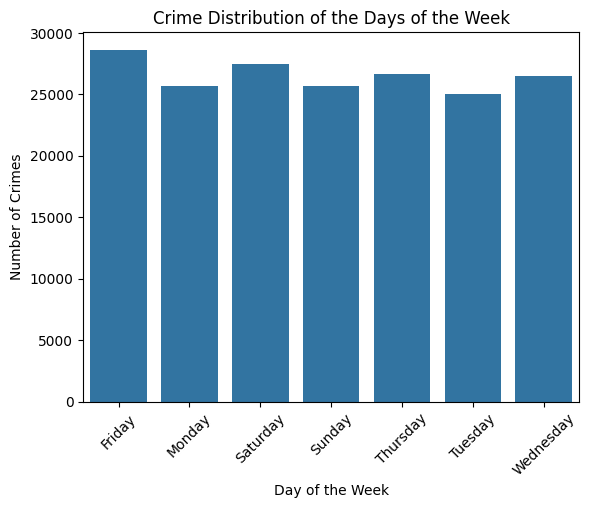

In [203]:
# Analysing crime data to identify patterns in the criminal activities
# Analysis 1: Crime distribution of the days of the week

# Extract the day of the week from the 'DATE OCC' column
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# Count the number of crimes on each day of the week
crime_day = df[['DR_NO',
                'Day of Week']].groupby('Day of Week').count().reset_index()
sns.barplot(x='Day of Week', y='DR_NO', data=crime_day)
plt.xticks(rotation=45)
plt.title('Crime Distribution of the Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

In [204]:
# Analysis 2: Crime distribution by the hour of the day sorted in descending order
peak_crime_hours = df['TIME OCC'].str.slice(0,2).astype(int).value_counts()
# Hour where most crimes are committed
peak_crime_hour = peak_crime_hours.idxmax()
print(peak_crime_hour)

12


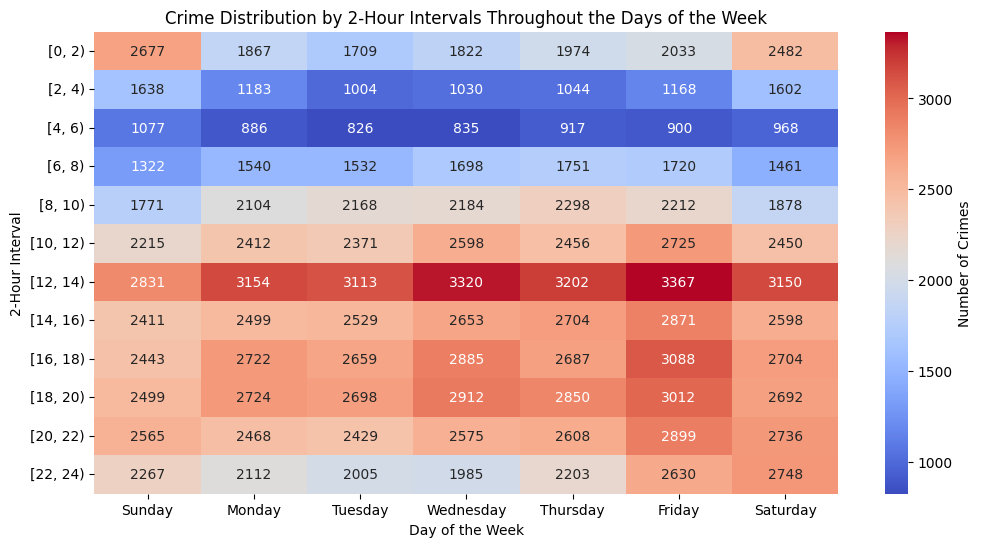

In [205]:
# Analysis 3 : Crime distribution by the hour of the day throughout the days of the week
# Convert 'TIME OCC' to a datetime format and extract the hour
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.hour

# Define the bins
bins = [i for i in range(0, 25, 2)]  # Creates intervals [0, 2, 4, ..., 24]

# Use pd.cut to create the 2-hour intervals
df['Time Interval'] = pd.cut(df['TIME OCC'], bins=bins, right=False, include_lowest=True)

# Now group by 'Day of Week' and 'Time Interval'
crime_hour = df[['DR_NO', 'Time Interval', 'Day of Week']].groupby(['Day of Week', 'Time Interval'], observed=False).count().reset_index()

# Pivot the data
crime_hour = crime_hour.pivot(index='Time Interval', columns='Day of Week', values='DR_NO')

# Reorder the columns
crime_hour = crime_hour[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_hour, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Distribution by 2-Hour Intervals Throughout the Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('2-Hour Interval')
plt.show()

Central


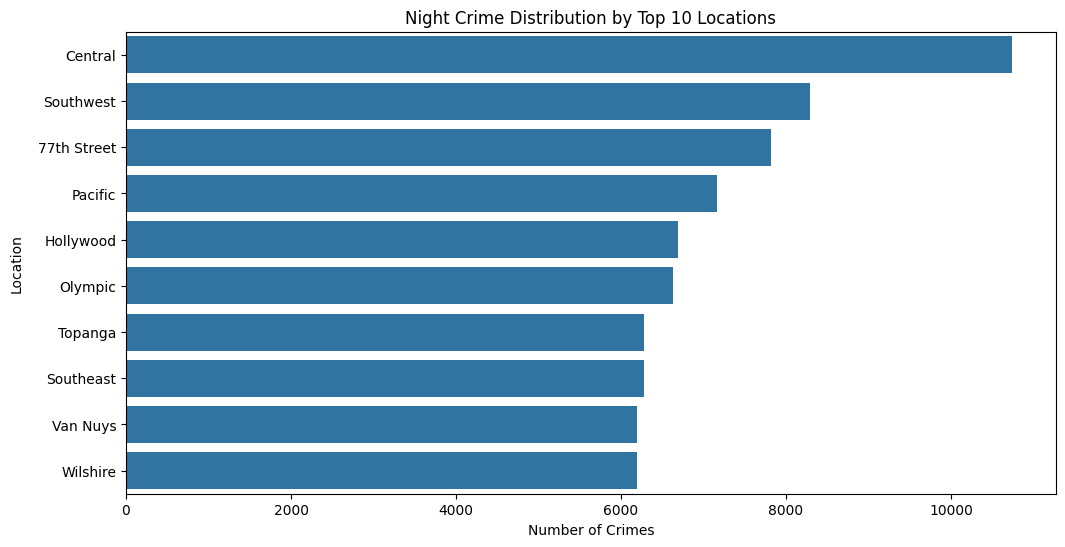

In [206]:
# Analysis 4: Night Crime distribution by top 10 area (crimes that occured between 10pm and 3:59am)
# Extract the hour from the 'TIME OCC' column
df['Hour'] = pd.to_datetime(df['TIME OCC'], format='%H%M',
                            errors='coerce').dt.hour
# Filter the data for crimes that occurred between 10pm and 3:59am
night_crimes = df[(df['Hour'] >= 22) | (df['Hour'] < 4)]

# Count the number of crimes at each location
night_crime_locations = night_crimes['AREA NAME'].value_counts().head(10)
peak_night_crime_location = night_crime_locations.idxmax()
print(peak_night_crime_location)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=night_crime_locations.values, y=night_crime_locations.index)
plt.title('Night Crime Distribution by Top 10 Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location', labelpad=10)
plt.show()

Vict Sex
M    93008
F    89854
X     2812
H       30
Name: count, dtype: int64


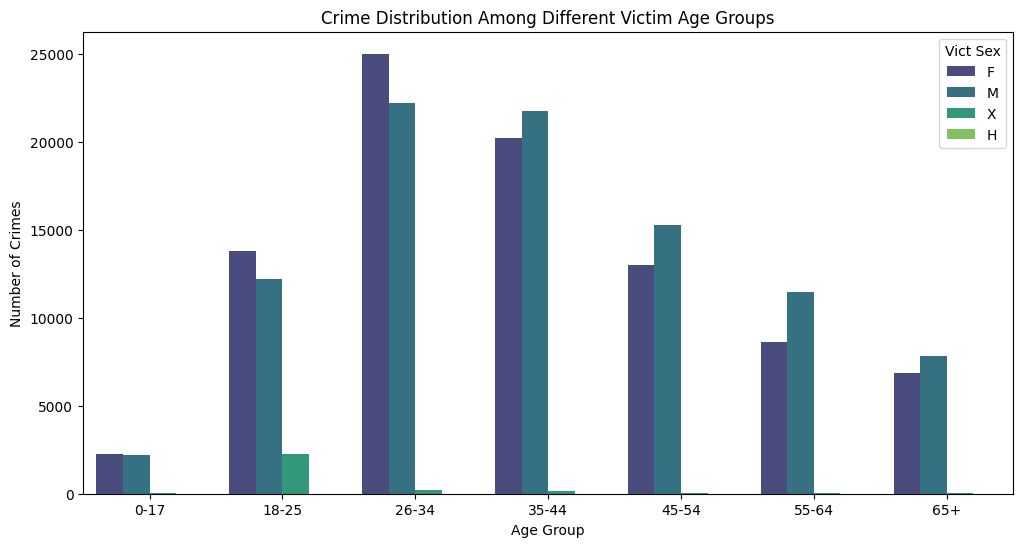

In [207]:
# Analysis 5: Crime distribution among different victim age groups
# Define the age groups
age_groups = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins=[0, 18, 26, 35, 45, 55, 65, np.inf]
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=age_groups, right=False)
victim_ages = df['Age Group'].value_counts().sort_index()
# Visualising the crime distribution by age group and victim sex

print(df['Vict Sex'].value_counts())

plt.figure(figsize=(12, 6))
plot = sns.countplot(x='Age Group',
              data=df,
              order=age_groups,
              hue='Vict Sex',
              palette='viridis')
plt.title('Crime Distribution Among Different Victim Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.show()

In [208]:
# Victim Sex should have only F, M and X values as per the data dictionary
print(df['Vict Sex'].value_counts())

Vict Sex
M    93008
F    89854
X     2812
H       30
Name: count, dtype: int64


In [209]:
print(df[df['Vict Sex'] == 'H'].head(2))

          DR_NO  Date Rptd   DATE OCC  TIME OCC   AREA NAME  \
1628  220511004 2022-07-05 2021-11-30         5      Harbor   
4132  220412589 2022-08-14 2022-08-13        22  Hollenbeck   

                Crm Cd Desc  Vict Age Vict Sex Vict Descent Weapon Desc  \
1628      THEFT OF IDENTITY        27        H            H         NaN   
4132  BURGLARY FROM VEHICLE        35        H            F         NaN   

      Status Desc                                 LOCATION Day of Week  \
1628  Invest Cont  1400 W  LOMITA                       BL     Tuesday   
4132  Invest Cont   100 S  BOYLE                        AV    Saturday   

     Time Interval  Hour Age Group  
1628        [4, 6)   NaN     26-34  
4132      [22, 24)   2.0     35-44  


In [210]:
# Changing the values of victim sex to X where it is labeled as H
df['Vict Sex'] = df['Vict Sex'].str.replace('H', 'X')


In [211]:
print(df['Vict Sex'].value_counts())

Vict Sex
M    93008
F    89854
X     2842
Name: count, dtype: int64


Vict Sex
M    93008
F    89854
X     2842
Name: count, dtype: int64


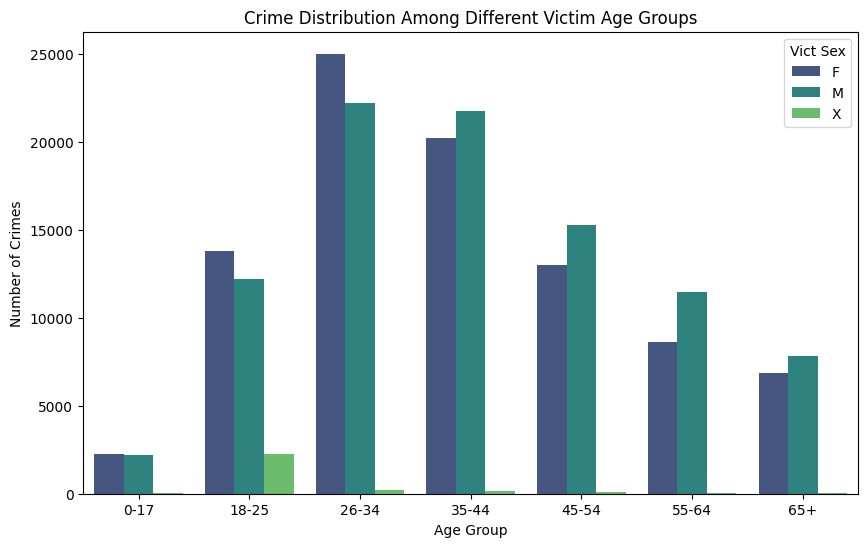

In [213]:
# Visualising the crime distribution by age group and victim sex

print(df['Vict Sex'].value_counts())

plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Age Group',
              data=df,
              order=age_groups,
              hue='Vict Sex',
              palette='viridis')
plt.title('Crime Distribution Among Different Victim Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.show()